In [1130]:
#Importing pandas and seaborn library

import pandas as pd
import seaborn as sb

In [1131]:
#Importing given data set from local system
df= pd.read_csv(r"C:\Users\16479\Downloads\sales_data.csv")

In [1132]:
#Printing datafran to take a holistic look
df

,Product,Region,Price,Units Sold,Sale Date
0,NaN,Region_6,75.96,10.0,2022-01-01
1,NaN,Region_1,175.78,8.0,2022-01-02
2,Product_46,Region_3,20.43,12.0,2022-01-03
3,Product_36,Region_1,12.77,10.0,2022-01-04
4,Product_17,Region_6,125.69,6.0,2022-01-05
...,...,...,...,...,...
1045,Product_45,Region_7,78.69,8.0,2022-07-28
1046,Product_1,Region_6,NaN,8.0,2022-08-02
1047,Product_17,Region_2,114.37,11.0,2023-12-18
1048,NaN,Region_8,NaN,5.0,2023-12-27


In [1133]:
#Getting null and type information about the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     947 non-null    object 
 1   Region      946 non-null    object 
 2   Price       945 non-null    float64
 3   Units Sold  946 non-null    float64
 4   Sale Date   1050 non-null   object 
dtypes: float64(2), object(3)
memory usage: 41.1+ KB


In [1134]:
#Getting basic stats about columns
df.describe(include='all')

,Product,Region,Price,Units Sold,Sale Date
count,947,946,945.000000,946.000000,1050
unique,50,10,NaN,NaN,1000
top,Product_45,Region_9,NaN,NaN,2022-07-28
freq,28,109,NaN,NaN,2
mean,NaN,NaN,107.598688,10.048626,NaN
std,NaN,NaN,124.020322,3.172261,NaN
min,NaN,NaN,0.200000,2.000000,NaN
25%,NaN,NaN,29.430000,8.000000,NaN
50%,NaN,NaN,78.130000,10.000000,NaN
75%,NaN,NaN,142.570000,12.000000,NaN


In [1135]:
#Since there is no Product/Region that is pre-dominant in the data in terms of frequency, may as well fill the null vales in those columns 
#with random values. Filling the blank values with the value above/below them in the string columns
df['Product'].fillna(method='ffill',inplace=True)
df['Region'].fillna(method='ffill',inplace=True)

In [1136]:
#Checking to see if randomize worked
df.describe(include='all')

,Product,Region,Price,Units Sold,Sale Date
count,1048,1050,945.000000,946.000000,1050
unique,50,10,NaN,NaN,1000
top,Product_5,Region_9,NaN,NaN,2022-07-28
freq,30,121,NaN,NaN,2
mean,NaN,NaN,107.598688,10.048626,NaN
std,NaN,NaN,124.020322,3.172261,NaN
min,NaN,NaN,0.200000,2.000000,NaN
25%,NaN,NaN,29.430000,8.000000,NaN
50%,NaN,NaN,78.130000,10.000000,NaN
75%,NaN,NaN,142.570000,12.000000,NaN


In [1137]:
#Ffill did not work for Product for the first two rows as they were both blank, so going to use bfill to fix that
df['Product'].fillna(method='bfill',inplace=True)
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     1050 non-null   object 
 1   Region      1050 non-null   object 
 2   Price       945 non-null    float64
 3   Units Sold  946 non-null    float64
 4   Sale Date   1050 non-null   object 
dtypes: float64(2), object(3)
memory usage: 41.1+ KB


,Product,Region,Price,Units Sold,Sale Date
count,1050,1050,945.000000,946.000000,1050
unique,50,10,NaN,NaN,1000
top,Product_5,Region_9,NaN,NaN,2022-07-28
freq,30,121,NaN,NaN,2
mean,NaN,NaN,107.598688,10.048626,NaN
std,NaN,NaN,124.020322,3.172261,NaN
min,NaN,NaN,0.200000,2.000000,NaN
25%,NaN,NaN,29.430000,8.000000,NaN
50%,NaN,NaN,78.130000,10.000000,NaN
75%,NaN,NaN,142.570000,12.000000,NaN


In [1138]:
#Creating a new dataframe to expirement with
df2= df.copy()

In [1139]:
#Removing all null values in the copy of dataframe brute clean the data
df2.dropna(inplace=True)

In [1140]:
#Cleaning duplicates from copy data just to get an idea how the data behaves
df2.drop_duplicates(inplace=True)
df2.describe(include='all')

,Product,Region,Price,Units Sold,Sale Date
count,813,813,813.000000,813.000000,813
unique,50,10,NaN,NaN,809
top,Product_33,Region_9,NaN,NaN,2023-02-07
freq,26,100,NaN,NaN,2
mean,NaN,NaN,105.611082,10.028290,NaN
std,NaN,NaN,124.407318,3.112099,NaN
min,NaN,NaN,0.200000,2.000000,NaN
25%,NaN,NaN,29.220000,8.000000,NaN
50%,NaN,NaN,75.950000,10.000000,NaN
75%,NaN,NaN,140.230000,12.000000,NaN


In [1141]:
#looking at stats based on product on Price to see how data behaves
df3=df2.groupby('Product')['Price'].aggregate(['mean','max','min','median','std'])

,mean,max,min,median,std
Product,,,,,
Product_1,79.049524,268.73,10.15,63.040,64.013786
Product_10,62.058000,291.53,0.33,33.680,74.829979
Product_11,99.705833,193.85,14.01,86.440,57.834297
Product_12,107.142222,249.05,7.60,94.880,79.731390
Product_13,88.544500,233.62,0.61,77.845,71.391134
Product_14,121.921176,517.29,5.13,104.210,128.079410
Product_15,216.692667,2143.30,3.60,38.100,546.997809
Product_16,101.582273,433.17,0.96,59.235,115.193645
Product_17,109.215263,420.47,5.76,69.270,113.508391


In [1142]:
#Since standard deviation is too varied from mean, makes sense to use median to replace Null values.
#joining previous table with original dataframe
df4 = pd.merge(left=df, right=df3, on='Product')
df4=df4.rename(columns={'median':'med'})
df4

,Product,Region,Price,Units Sold,Sale Date,mean,max,min,med,std
0,Product_46,Region_6,75.96,10.0,2022-01-01,98.084706,273.74,5.81,85.10,75.253618
1,Product_46,Region_1,175.78,8.0,2022-01-02,98.084706,273.74,5.81,85.10,75.253618
2,Product_46,Region_3,20.43,12.0,2022-01-03,98.084706,273.74,5.81,85.10,75.253618
3,Product_46,Region_6,37.44,10.0,2022-02-16,98.084706,273.74,5.81,85.10,75.253618
4,Product_46,Region_1,5.81,8.0,2022-06-29,98.084706,273.74,5.81,85.10,75.253618
...,...,...,...,...,...,...,...,...,...,...
1045,Product_19,Region_10,NaN,7.0,2023-10-04,122.323158,368.16,7.78,69.63,108.737762
1046,Product_19,Region_7,59.37,15.0,2023-10-15,122.323158,368.16,7.78,69.63,108.737762
1047,Product_19,Region_6,151.38,12.0,2024-01-13,122.323158,368.16,7.78,69.63,108.737762
1048,Product_19,Region_6,276.20,9.0,2024-01-24,122.323158,368.16,7.78,69.63,108.737762


In [1143]:
#Filling in NA values with the median value
df4['Price'].fillna(df4['med'],inplace=True)

In [1144]:
#Removing excess columns of stats
df4.drop(columns=['mean','med','min','max','std'],inplace=True)
df4

,Product,Region,Price,Units Sold,Sale Date
0,Product_46,Region_6,75.96,10.0,2022-01-01
1,Product_46,Region_1,175.78,8.0,2022-01-02
2,Product_46,Region_3,20.43,12.0,2022-01-03
3,Product_46,Region_6,37.44,10.0,2022-02-16
4,Product_46,Region_1,5.81,8.0,2022-06-29
...,...,...,...,...,...
1045,Product_19,Region_10,69.63,7.0,2023-10-04
1046,Product_19,Region_7,59.37,15.0,2023-10-15
1047,Product_19,Region_6,151.38,12.0,2024-01-13
1048,Product_19,Region_6,276.20,9.0,2024-01-24


In [1145]:
#Repeathing the steps above for Units Sold
df5=df2.groupby('Product')['Units Sold'].aggregate(['mean','max','min','median','std'])
df5



,mean,max,min,median,std
Product,,,,,
Product_1,10.190476,16.0,7.0,9.0,2.441701
Product_10,10.800000,16.0,3.0,10.0,3.783422
Product_11,11.333333,14.0,8.0,11.5,2.348436
Product_12,10.111111,16.0,3.0,11.0,3.822448
Product_13,10.600000,19.0,2.0,10.0,4.321306
Product_14,10.823529,19.0,5.0,10.0,3.745586
Product_15,10.600000,14.0,5.0,11.0,2.640346
Product_16,9.727273,18.0,5.0,8.5,3.254035
Product_17,9.473684,15.0,5.0,9.0,3.097820


In [1146]:
#Average makes more sense for Unit Sold
df6 = pd.merge(left=df4, right=df5, on='Product')
df6=df6.rename(columns={'mean':'avg'})
df6

,Product,Region,Price,Units Sold,Sale Date,avg,max,min,median,std
0,Product_46,Region_6,75.96,10.0,2022-01-01,9.470588,14.0,6.0,10.0,2.294495
1,Product_46,Region_1,175.78,8.0,2022-01-02,9.470588,14.0,6.0,10.0,2.294495
2,Product_46,Region_3,20.43,12.0,2022-01-03,9.470588,14.0,6.0,10.0,2.294495
3,Product_46,Region_6,37.44,10.0,2022-02-16,9.470588,14.0,6.0,10.0,2.294495
4,Product_46,Region_1,5.81,8.0,2022-06-29,9.470588,14.0,6.0,10.0,2.294495
...,...,...,...,...,...,...,...,...,...,...
1045,Product_19,Region_10,69.63,7.0,2023-10-04,9.789474,15.0,5.0,10.0,2.897872
1046,Product_19,Region_7,59.37,15.0,2023-10-15,9.789474,15.0,5.0,10.0,2.897872
1047,Product_19,Region_6,151.38,12.0,2024-01-13,9.789474,15.0,5.0,10.0,2.897872
1048,Product_19,Region_6,276.20,9.0,2024-01-24,9.789474,15.0,5.0,10.0,2.897872


In [1147]:
#Filling null data
df6['Units Sold'].fillna(df6['avg'],inplace=True)
df6

,Product,Region,Price,Units Sold,Sale Date,avg,max,min,median,std
0,Product_46,Region_6,75.96,10.0,2022-01-01,9.470588,14.0,6.0,10.0,2.294495
1,Product_46,Region_1,175.78,8.0,2022-01-02,9.470588,14.0,6.0,10.0,2.294495
2,Product_46,Region_3,20.43,12.0,2022-01-03,9.470588,14.0,6.0,10.0,2.294495
3,Product_46,Region_6,37.44,10.0,2022-02-16,9.470588,14.0,6.0,10.0,2.294495
4,Product_46,Region_1,5.81,8.0,2022-06-29,9.470588,14.0,6.0,10.0,2.294495
...,...,...,...,...,...,...,...,...,...,...
1045,Product_19,Region_10,69.63,7.0,2023-10-04,9.789474,15.0,5.0,10.0,2.897872
1046,Product_19,Region_7,59.37,15.0,2023-10-15,9.789474,15.0,5.0,10.0,2.897872
1047,Product_19,Region_6,151.38,12.0,2024-01-13,9.789474,15.0,5.0,10.0,2.897872
1048,Product_19,Region_6,276.20,9.0,2024-01-24,9.789474,15.0,5.0,10.0,2.897872


In [1148]:
df6.drop(columns=['avg','median','min','max','std'],inplace=True)

In [1149]:
#DF6 is now the final data set with all null values fixed
df6.drop_duplicates(inplace=True)
df6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1005 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     1005 non-null   object 
 1   Region      1005 non-null   object 
 2   Price       1005 non-null   float64
 3   Units Sold  1005 non-null   float64
 4   Sale Date   1005 non-null   object 
dtypes: float64(2), object(3)
memory usage: 47.1+ KB


<Axes: xlabel='Price', ylabel='Units Sold'>

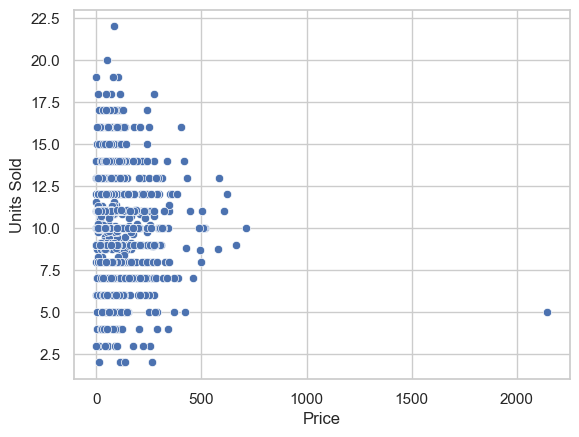

In [1150]:
#Initial visualization to see how the data looks. Seems like there is one outlier 2000
sb.scatterplot(data=df6, x='Price', y='Units Sold')

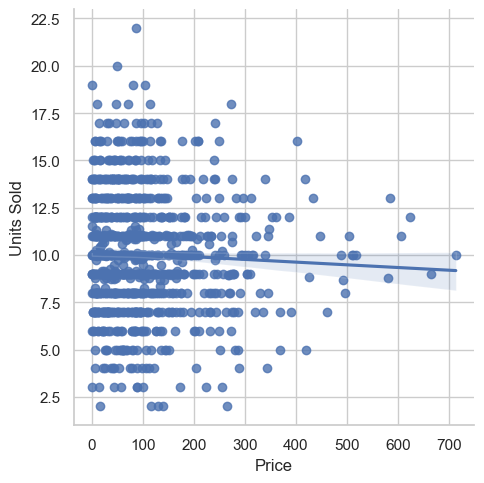

In [1151]:
#Removing outlier of Price>2000
df6.drop(df6[df6['Price']>2000].index, axis=0, inplace=True)
sb.lmplot(data=df6, x='Price', y='Units Sold', fit_reg=True)


In [1152]:
#Creating summary of region vs sum of units sold to see how they perform, and plotting graph
df_sum=df6.groupby('Region')['Units Sold'].aggregate(['sum'])
df_sum


,sum
Region,
Region_1,890.464811
Region_10,1156.821284
Region_2,888.600733
Region_3,956.415873
Region_4,1068.580182
Region_5,1041.394209
Region_6,1030.731019
Region_7,836.585525
Region_8,1040.140705


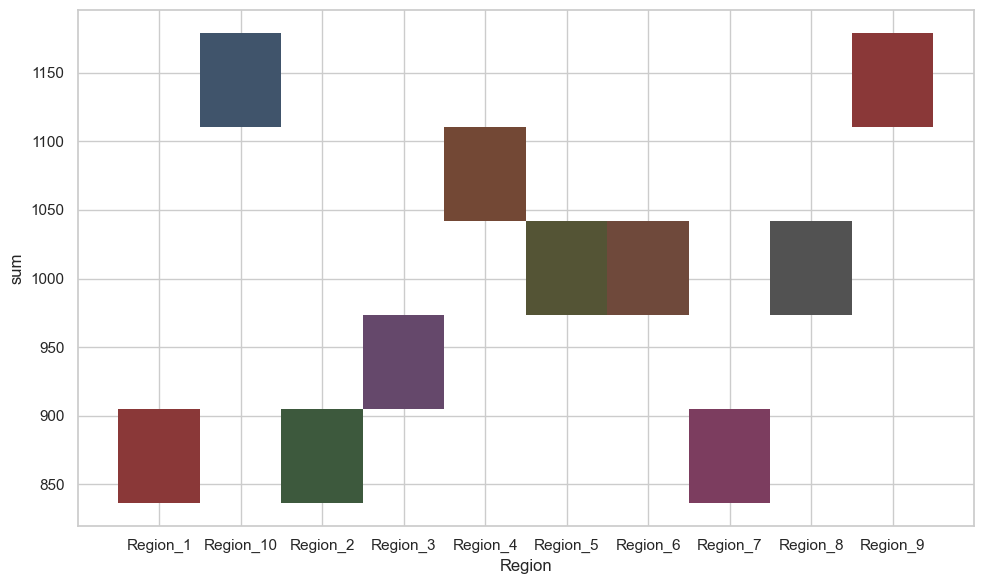

In [1153]:
#The charts were too tight, so using plt to space them out
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sb.histplot(data=df_sum, x='Region', y='sum',hue='Region', palette='Set1', legend=False)
plt.tight_layout()
plt.show()

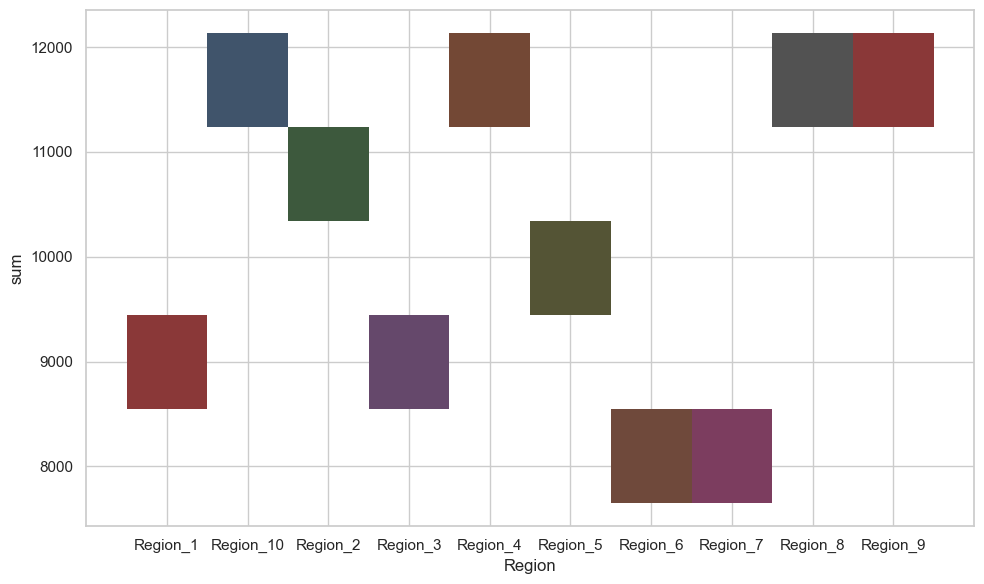

In [1154]:
#same analysis on Region and price

df_sum1=df6.groupby('Region')['Price'].aggregate(['sum'])
df_sum1
plt.figure(figsize=(10, 6))
sb.histplot(data=df_sum1, x='Region', y='sum',hue='Region', palette='Set1', legend=False)
plt.tight_layout()
plt.show()


<Axes: xlabel='Year', ylabel='sum'>

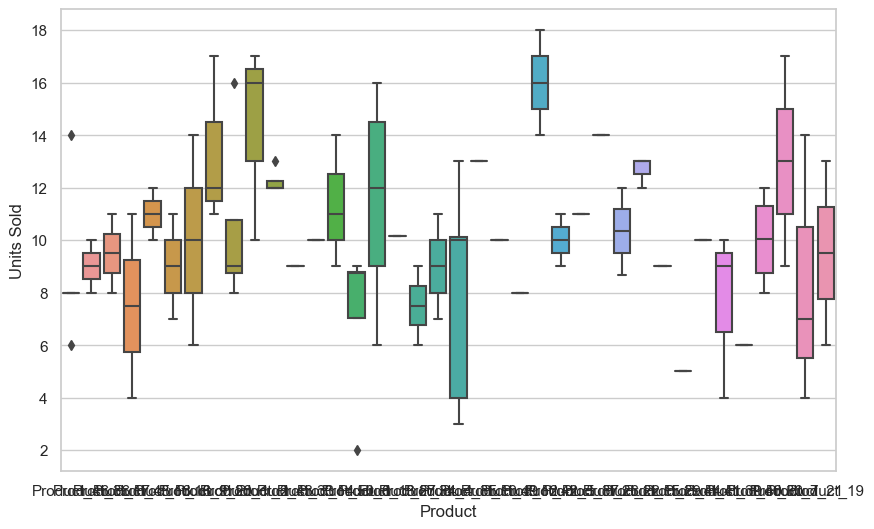

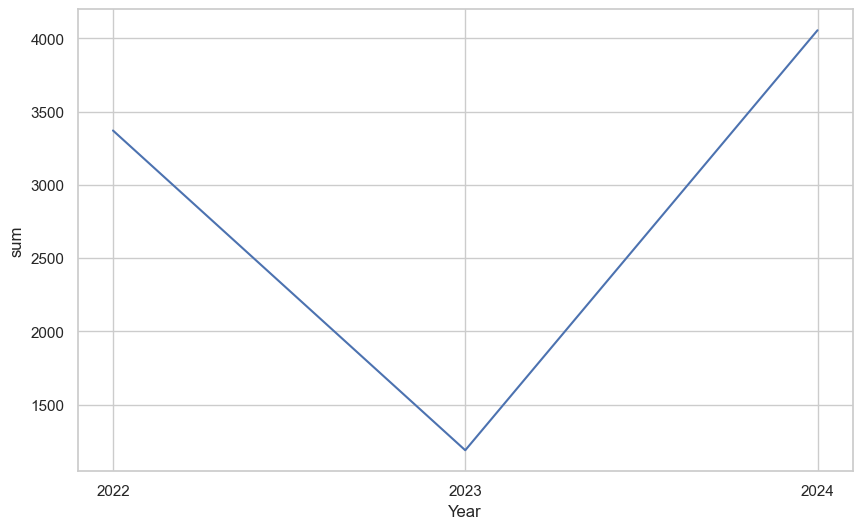

In [1155]:
#Looking at the two charts above, it seems that Region 1 and 7 are not performing well in terms of both price and Units sold.
#. For now we will take Region as lowest performing and Region 10 as highest performing (Also not a very useful graph)



df6['Sale Date']=pd.to_datetime(df6['Sale Date'])
df6['Year'] = df6['Sale Date'].dt.strftime('%Y')

df_region1= df6[df6['Region'] =='Region_1']
plt.figure(figsize=(10, 6))
sb.boxplot(data=df_region1, x='Product', y='Units Sold')

df_regY1=df_region1.groupby('Year')['Price'].aggregate(['sum'])
df_regY1

plt.figure(figsize=(10, 6))
sb.lineplot(data=df_regY1, x='Year', y='sum')


In [1156]:
#We can see Region 1 did not perform well in 2023, so let's see if a particular month impacted the sales.

df6['Month'] = df6['Sale Date'].dt.strftime('%B')

df_region1 = df6[(df6['Region'] == 'Region_1') ]
YoY1 = pd.pivot_table(df_region1, values='Price', index='Month', columns='Year')
YoY1


Year,2022,2023,2024
Month,,,
April,57.895000,NaN,124.0350
August,66.926667,NaN,50.5400
December,70.246667,33.605000,NaN
February,87.803333,53.610000,100.1300
January,75.987500,4.960000,169.7700
July,307.220000,79.424000,111.1050
June,37.286667,100.016667,170.8300
March,84.035000,36.045000,64.1900
May,172.950000,6.605000,247.0725


In [1157]:
#Let's see how region 10 did over the years

df_region10= df6[df6['Region'] =='Region_10']
df_regY10=df_region10.groupby('Year')['Price'].aggregate(['sum'])
df_regY10


df_region10 = df6[(df6['Region'] == 'Region_10')]
YoY10 = pd.pivot_table(df_region10, values='Price', index='Month', columns='Year')
YoY10

Year,2022,2023,2024
Month,,,
April,131.090000,88.440000,108.9225
August,119.983333,153.708571,17.8275
December,81.587500,150.310000,NaN
February,77.820000,64.196667,198.5950
January,193.850000,96.844000,68.0975
July,76.975000,84.115000,87.1200
June,74.836667,131.757500,135.7450
March,38.775000,130.582500,143.2350
May,47.510000,80.265000,103.8760


In [1158]:
#Performing similar analysis on Product. However, given that there are too many products, we will just compare the top and bottom 5

df_sumPU=df6.groupby('Product')['Units Sold'].aggregate(['sum'])
df_sumPU.sort_values('sum',ascending=True,inplace=True)
df_sumPU.head(5)


,sum
Product,
Product_38,126.0
Product_49,127.0
Product_3,128.0
Product_26,133.0
Product_36,138.5


In [1159]:
df_sumPU.tail(5)

,sum
Product,
Product_30,265.263158
Product_50,272.100000
Product_4,278.700000
Product_5,279.818182
Product_33,285.653846


In [1160]:
df_sumPP=df6.groupby('Product')['Price'].aggregate(['sum'])
df_sumPP.sort_values('sum',ascending=True,inplace=True)
df_sumPP.head(5)

,sum
Product,
Product_3,620.665
Product_10,1065.200
Product_38,1167.680
Product_9,1181.915
Product_18,1185.775


In [1161]:
df_sumPP.tail(5)

,sum
Product,
Product_50,2675.505
Product_45,2842.675
Product_30,2891.930
Product_31,3212.250
Product_40,3489.295


<Axes: xlabel='Product', ylabel='Price'>

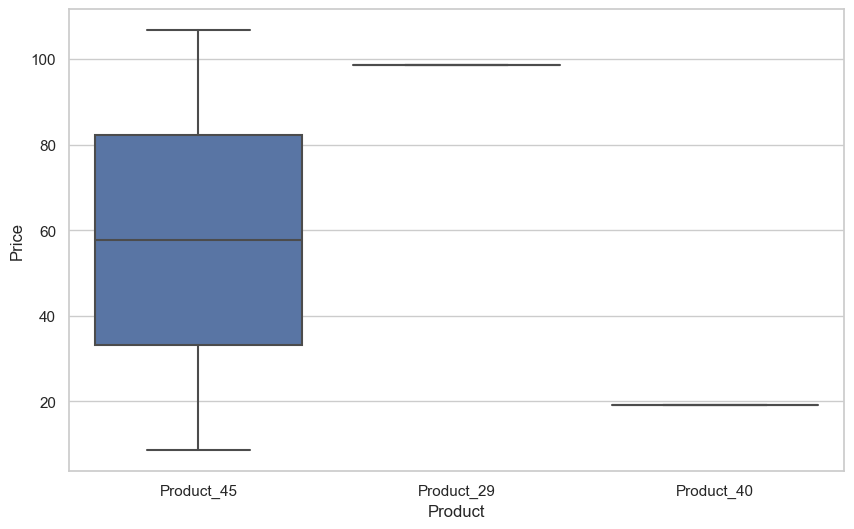

In [1162]:
#Let's see how the top and bottom 5 products are doing in the best and worst performing regions

#Bottom region and bottom 5 products
df_region1= df6[(df6['Region'] =='Region_1') & (df6['Product'].isin(['Prouct_30','Product_45','Product_29','Product_31','Product_40']))]
plt.figure(figsize=(10, 6))
sb.boxplot(data=df_region1, x='Product', y='Price')

<Axes: xlabel='Product', ylabel='Price'>

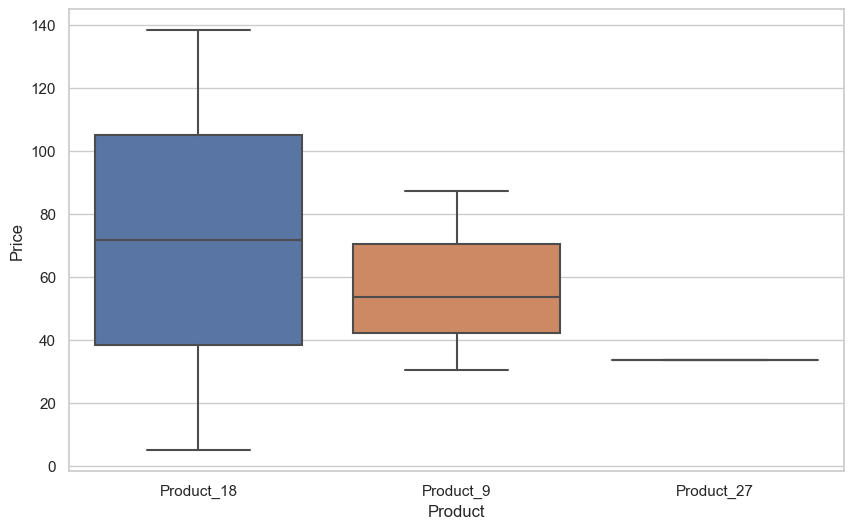

In [1163]:
#Bottom region and top 5 products
df_region1= df6[(df6['Region'] =='Region_1') & (df6['Product'].isin(['Prouct_3','Product_9','Product_18','Product_38','Product_27']))]
plt.figure(figsize=(10, 6))
sb.boxplot(data=df_region1, x='Product', y='Price')

<Axes: xlabel='Product', ylabel='Price'>

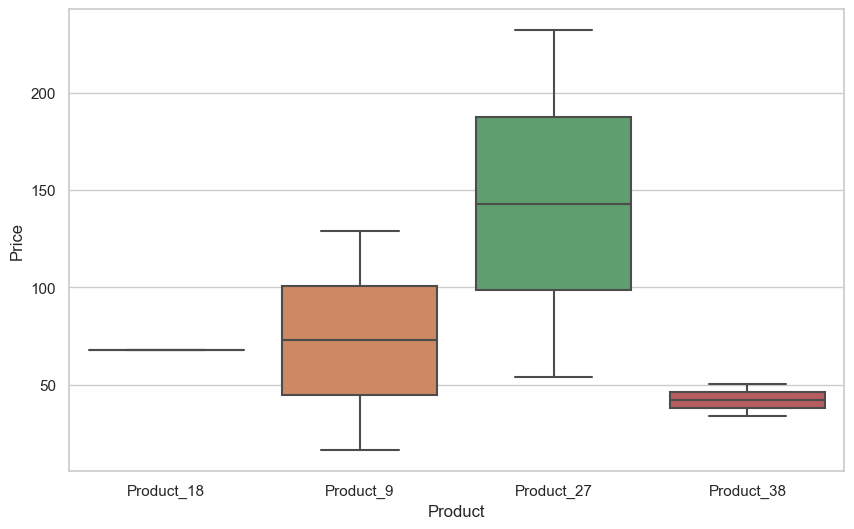

In [1164]:
#Top region and top 5 products
df_region10= df6[(df6['Region'] =='Region_10') & (df6['Product'].isin(['Prouct_3','Product_9','Product_18','Product_38','Product_27']))]
plt.figure(figsize=(10, 6))
sb.boxplot(data=df_region10, x='Product', y='Price')

<Axes: xlabel='Product', ylabel='Price'>

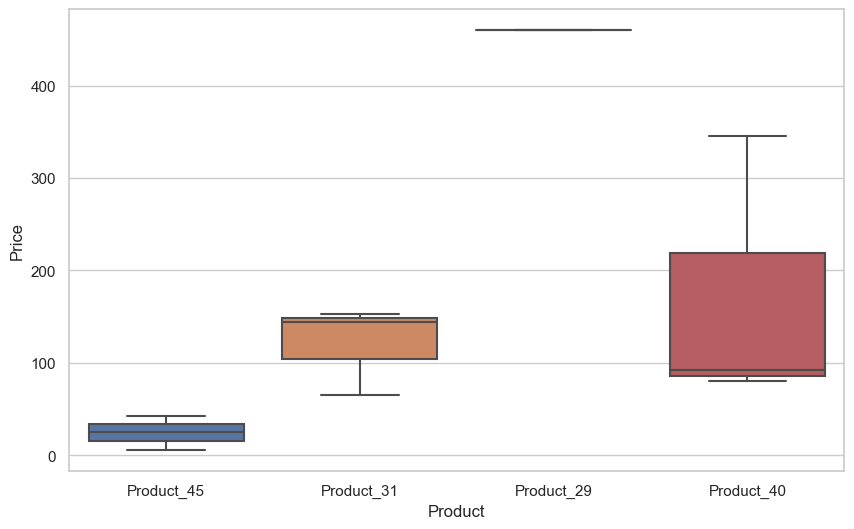

In [1165]:
#Top region and bottom 5 products
df_region10= df6[(df6['Region'] =='Region_10') & (df6['Product'].isin(['Prouct_30','Product_45','Product_29','Product_31','Product_40']))]
plt.figure(figsize=(10, 6))
sb.boxplot(data=df_region10, x='Product', y='Price')

In [1166]:
df_Product30= df6[df6['Product'] =='Product_30']
df_regY30=df_Product30.groupby('Year')['Price'].aggregate(['sum'])
df_regY30


df_Product30 = df6[(df6['Product'] == 'Product_30')]
YoY30 = pd.pivot_table(df_Product30, values='Price', index='Month', columns='Year')
YoY30

Year,2022,2023,2024
Month,,,
April,NaN,87.59,35.440
August,NaN,69.68,NaN
December,105.195,2.39,NaN
January,NaN,100.11,385.960
July,NaN,81.21,202.275
June,NaN,139.47,83.745
March,NaN,NaN,144.970
May,131.540,NaN,142.900
November,NaN,196.94,NaN


<Axes: xlabel='Region', ylabel='Price'>

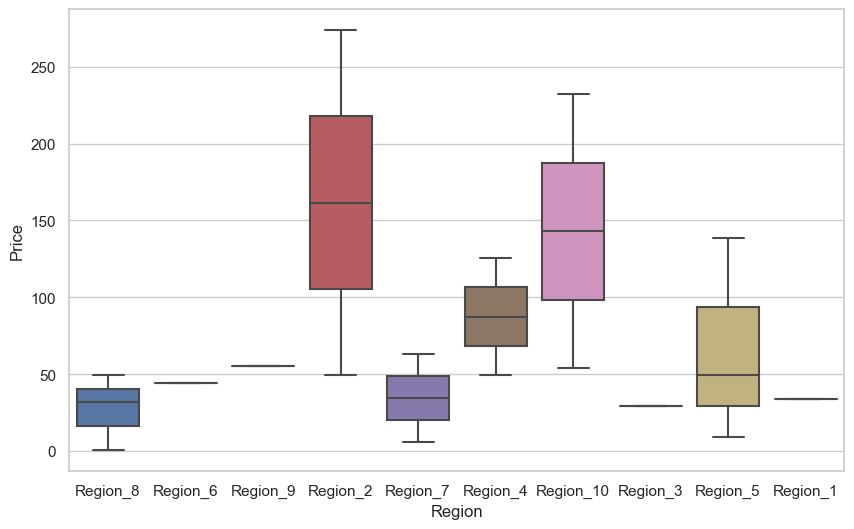

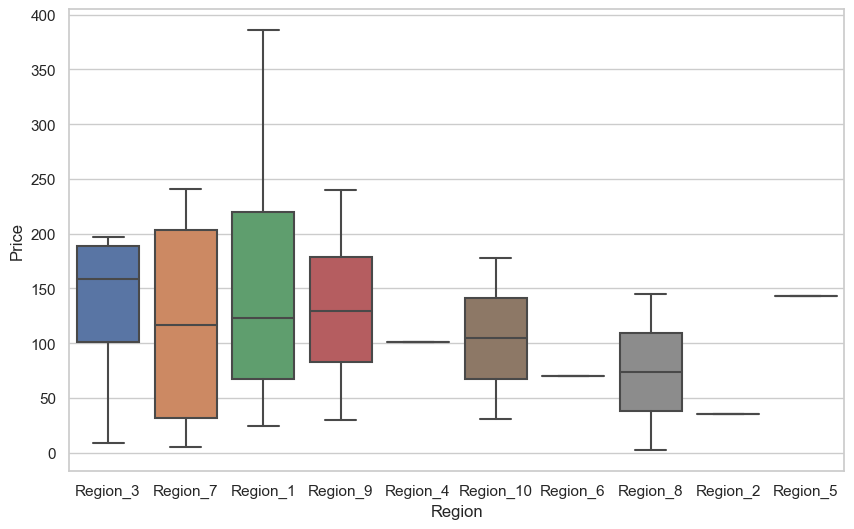

In [1167]:
#And finally, lets look at the top and bottom performing product across all regions

df_product27= df6[(df6['Product'] =='Product_27') ]
plt.figure(figsize=(10, 6))
sb.boxplot(data=df_product27, x='Region', y='Price')

df_product30= df6[(df6['Product'] =='Product_30') ]
plt.figure(figsize=(10, 6))
sb.boxplot(data=df_product30, x='Region', y='Price')


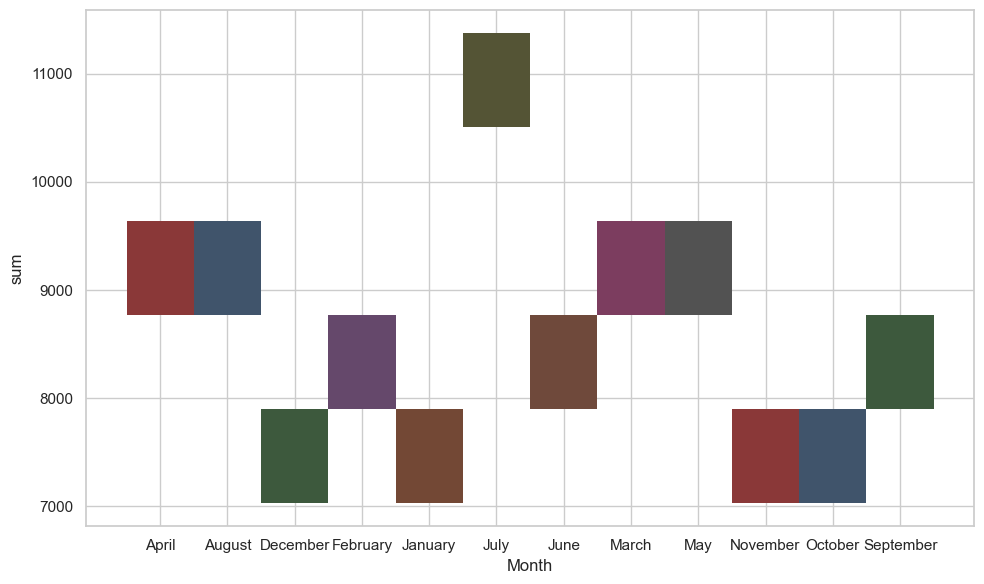

In [1168]:
df_sumMonth=df6.groupby('Month')['Price'].aggregate(['sum'])
plt.figure(figsize=(10, 6))
sb.histplot(data=df_sumMonth, x='Month', y='sum',hue='Month', palette='Set1', legend=False)
plt.tight_layout()
plt.show()

1)  What conclusions can you draw about sales performance of various products and regions?

    -In terms of both Price and Units Sold, Region 1 and Region 7 are not doing well. On the other hand, Regions 9 and 10 are doing well by both parameters.

    -Looking at Region 1, it did not perform well in the first 6 months of 2023, when compared to the year before and after. Region one also has limited number of products being sold, having only 3 of the 5 best products.

    -The lowest selling product- Product 27 is not doing too well across all regions, and comparing it to the highest selling Product (30), their average sale is the highest sale for Product 27

2)  What recommendations do you have for the business?

    -Sales in the last quarter (especially winter months) are lower compared to all other months throughout the years, so the company could do some more research on how they can bring customers during that time. Given accessibility issues in winter, more online services can be offered.

    -Customer survey can be done in region 1 to see why the products are not selling (could be population, income, and other factors). The highest selling products (top 5-38,49,3,26,36) should be promoted heavily in that region to increase the sale.

    -For orders more than ~18 units, the price is too low, the company could impose minimum order value on such orders to increase sale.

3) Describe your data cleaning approach. How and why did you decide on which cleaning techniques to use?

    -Based on initial analysis, it looks like there is no prominent product or region, so the best bet is to fill the blank (~100) randomly and distribute the values across the blanks. So, I am using ffill and bfill functionality to fill the null values with the value above/below it. This will ensure true randomization since the data is not yet sorted by either field.
    
    -Now to figure out the null values in price and Units, I am creating a new data set in which all nulls and duplicates have been removed. Using this dataset, looking into the statistical values across price and units sold based on Product and region. 
    
    -Creating a summary on product and Price, and evaluating min, max, mean, median and standard deviation. Looking at the data, there is quite some variation in standard variation, so excluding mean as a replacement method and choosing to go with median. Performing a similar exercise for Units sold, and since the standard variation is normal, we will replace null values with mean.
    
    -Joining the summary dataframe of Product and Median with the original dataframe and filling null values in price column with the Median. Similar steps performed for Units Sold and Mean.
    
    -Now that all null values have been filled, removing duplicates. We are now left with 1005 records with all values being non-null.
    
    -As a final step, to take a visual look at the data, creating a scatterplot across Price and Units Sold, it looks like we have one outlier that's out there, so we will make an exclusion for Price>2000
    
    -We now have the completed cleaning the data.
        Assumption: 
        
            A. Sale dates in 2024 and all those after current real-life date are not future data, but just randomly generated for the purpose of this exercise.
            B. Each line represents an order, witch Price being total order value, and Units sold represents the number of items. So, price is the cost of sale, not cost of each product.




